# pyGMS example

In [1]:
%load_ext autoreload
%autoreload 2
from pyGMS import GMS
import matplotlib.pyplot as plt
from matplotlib import tri
import numpy as np

## Load a model

In [2]:
model = GMS('./model.fem')

Loading ./model.fem
Done!
Triangulating layers
Done!


In [3]:
model.info

,./model.fem
Number of layers,46
Number of unique layers,6
Points per layer,1881
Number of points,86526
xlim,"(200000.0, 1000000.0)"
ylim,"(6200000.0, 7600000.0)"
zlim,"(-102500.104684, 4736.80127)"


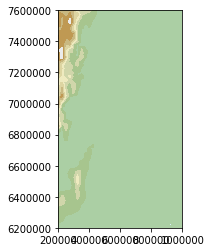

In [4]:
model.plot_topography()

## Load variables

The variables names are stored in the `field_dict`. They need to be added individually
so that they can be used for analysis.

In [8]:
model.field_dict.keys()

dict_keys(['X', 'Y', 'Z', 'RhoB', 'Tcond', 'Tspec', 'HeatGen', 'T'])

In [30]:
model.layer_add_var('T')

# Visualisation

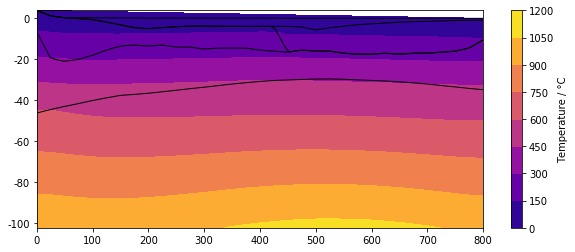

In [5]:
x0 = 200e3
y0 = 7000e3
x1 = 1000e3
y1 = 7000e3
fig, ax = plt.subplots(figsize=(10,4))
cm = model.plot_profile(x0, y0, x1, y1, var='T', ax=ax, cmap='plasma')
model.plot_layer_bounds(x0, y0, x1, y1, ax=ax)
fig.colorbar(cm, ax=ax, label='Temperature / °C')

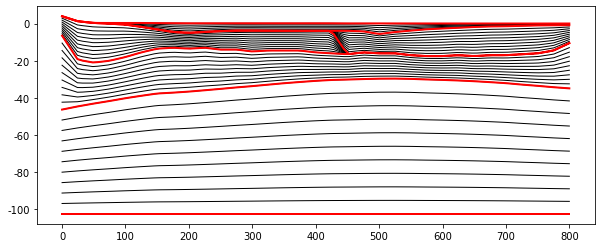

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
model.plot_layer_bounds(x0, y0, x1, y1, ax=ax, only='all')
model.plot_layer_bounds(x0, y0, x1, y1, ax=ax, only='unique', lc='red', lw=2)

# Computations

## Thermal field

### Surface heat flow

Computing surface heat flow
Progress: 100%


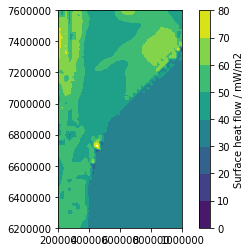

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
cm = model.plot_surface_heat_flow(ax=ax, levels=np.linspace(0, 80, 9))
fig.colorbar(cm, ax=ax, label='Surface heat flow / mW/m2');

## Rheology

Create a list of material properties

In [33]:
materials = list()

materials.append(dict(name='quartzite_wet_2440',
        # Byerlee's law
        f_f_e=0.75,       # Friction coefficient extension
        f_f_c=2.0,        # Friction coefficient compression
        f_p=0.35,         # Pore fluid factor
        rho_b=2440.0,     # Bulk density
        # Dislocation creep
        a_p=1e-28,        # Preexponential scaling factor
        n=4.0,            # Power law exponent
        q_p=223e3))       # Activation energy


materials.append(dict(name='quartzite_wet_2800',
        # Byerlee's law
        f_f_e=0.75,       # Friction coefficient extension
        f_f_c=2.0,        # Friction coefficient compression
        f_p=0.35,         # Pore fluid factor
        rho_b=2800.0,     # Bulk density
        # Dislocation creep
        a_p=1e-28,        # Preexponential scaling factor
        n=4.0,            # Power law exponent
        q_p=223e3))       # Activation energy


materials.append(dict(name='diabase_dry',
        altname='Gabbroid rocks',
        # Byerlee's law
        f_f_e=0.75,       # Friction coefficient extension
        f_f_c=2.0,        # Friction coefficient compression
        f_p=0.35,         # Pore fluid factor
        rho_b=2800.0,     # Bulk density
        # Dislocation creep
        a_p=6.31e-20,     # Preexponential scaling factor
        n=3.05,           # Power law exponent
        q_p=276.0e3))     # Activation energy


materials.append(dict(name='plagioclase_wet',
        # Byerlee's law
        f_f_e=0.75,       # Friction coefficient extension
        f_f_c=2.0,        # Friction coefficient compression
        f_p=0.35,         # Pore fluid factor
        rho_b=3100.0,     # Bulk density
        # Dislocation creep
        a_p=3.981e-16,    # Preexponential scaling factor
        n=3.0,            # Power law exponent
        q_p=356e3))       # Activation energy


materials.append(dict(name='peridotite_dry',
        # Byerlee's law
        f_f_e=0.75,       # Friction coefficient extension
        f_f_c=2.0,        # Friction coefficient compression
        f_p=0.35,         # Pore fluid factor
        rho_b=3300.0,     # Bulk density
        # Dislocation creep
        a_p=5.011e-17,    # Preexponential scaling factor
        n=3.5,            # Power law exponent
        q_p=535e3,        # Activation energy
        # Diffusion creep
        a_f=2.570e-11,    # Preexp. scaling factor
        q_f=300e3,        # Activation energy
        a=0.1e-3,         # Grain size
        m=2.5,            # Grain size exponent
        # Dorn's law
        sigma_d=8.5e9,    # Dorn's law stress
        q_d=535e3,        # Dorn's law activation energy
        a_d=5.754e11))    # Dorn's law strain rate


Now assign the properties to the bodies of the model

In [34]:
body_materials={
    'Sediments':'quartzite_wet_2440',
    'UpperCrustPampia': 'quartzite_wet_2800',
    'UpperCrustRDP': 'diabase_dry',
    'LowerCrust':'plagioclase_wet',
    'LithMantle': 'peridotite_dry',
    'Base':'peridotite_dry'
}


strain_rate = 1e-16   # 1/s

model.set_rheology(strain_rate, materials, body_materials)

### Yield strength envelopes

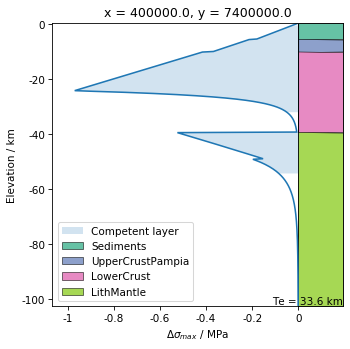

In [36]:
x = 400e3
y = 7400e3
loc = (x, y)
kwds_fig = {'figsize': (5, 5), 'dpi': 75}
model.plot_yse(loc, plot_bodies=True, kwds_fig=kwds_fig);

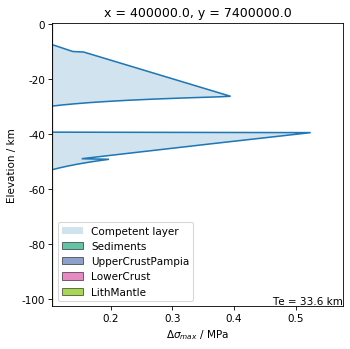

In [37]:
model.plot_yse(loc, mode='extension', plot_bodies=True, kwds_fig=kwds_fig);

### Yield strength profiles

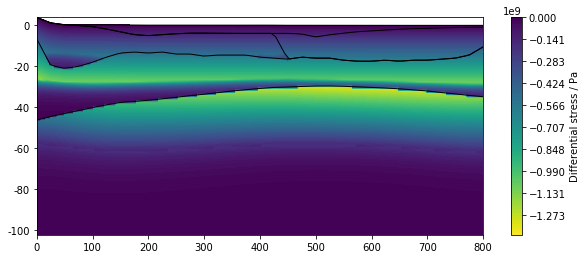

In [40]:
fig, ax = plt.subplots(figsize=(10,4))
color_levels = np.linspace(-1.4e9, 0, 100)
cm = model.plot_strength_profile(x0, y0, x1, y1, ax=ax,
                                 levels=color_levels)
model.plot_layer_bounds(x0, y0, x1, y1, ax=ax)
fig.colorbar(cm, ax=ax, label='Differential stress / Pa');

Showing the boundary of the competent layers:

Computing strength
Progress: 100%


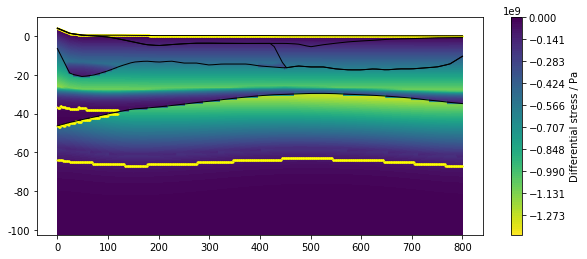

In [41]:
fig, ax = plt.subplots(figsize=(10,4))
kwds_competent = dict(color='yellow')
cm = model.plot_strength_profile(x0, y0, x1, y1, ax=ax,
                                 levels=color_levels,
                                 show_competent=True,
                                 competent_kwds=kwds_competent)
model.plot_layer_bounds(x0, y0, x1, y1, ax=ax)
fig.colorbar(cm, ax=ax, label='Differential stress / Pa');

### Integrated strength

In [42]:
model.compute_integrated_strength()

Computing integrated strength
Progress: 100%


/home/user/anaconda3/envs/pygms/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


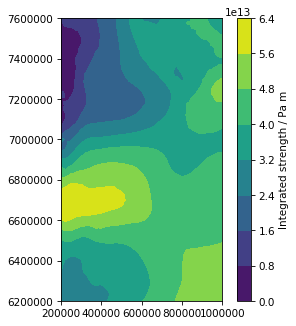

In [43]:
strength = model.integrated_strength
triangulation = tri.Triangulation(strength[:, 0], strength[:, 1])

fig, ax = plt.subplots(figsize=(5,5), dpi=75)
ax.set_aspect('equal')
cm = ax.tricontourf(triangulation, strength[:, 2])
fig.colorbar(cm, label='Integrated strength / Pa m')
fig.show()

### Effective elastic thickness

Computing elastic thickness
> Mode                      : compression
> Strain rate               : 1e-16 1/s
> Horizontal resolution     : 50000.0 m
> Number of vertical points : 500
> Min. sigma criterion      : 20 MPa
> Lithostatic pressure crit.: 5.0 % of Plitho
Progress: 100%


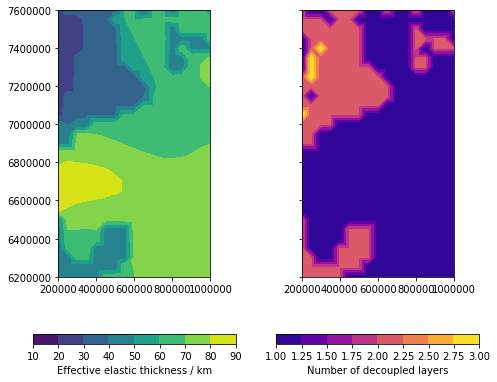

In [16]:
model.compute_elastic_thickness()
nlays, eet = model.elastic_thickness[1e-16]
triangulation = tri.Triangulation(eet[:,0], eet[:,1])

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,7))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
cm_eet = ax[0].tricontourf(triangulation, eet[:,2]/1000)
cm_nlay = ax[1].tricontourf(triangulation, nlays, cmap='plasma')
fig.colorbar(cm_eet, ax=ax[0], orientation='horizontal', label='Effective elastic thickness / km')
fig.colorbar(cm_nlay, ax=ax[1], orientation='horizontal', label='Number of decoupled layers')

### Brittle-ductile transition

In [17]:
model.compute_bd_thickness()

Computing brittle/ductile thicknesses
> Strain rate: 1e-16 1/s 
> Resolution : 50000.0 m 
Progress: 100%


In [18]:
x = model.t_brittle[0]/1000
y = model.t_brittle[1]/1000
ts = model.t_brittle[2]

Text(0.5, 0.98, 'Brittle thicknesses')

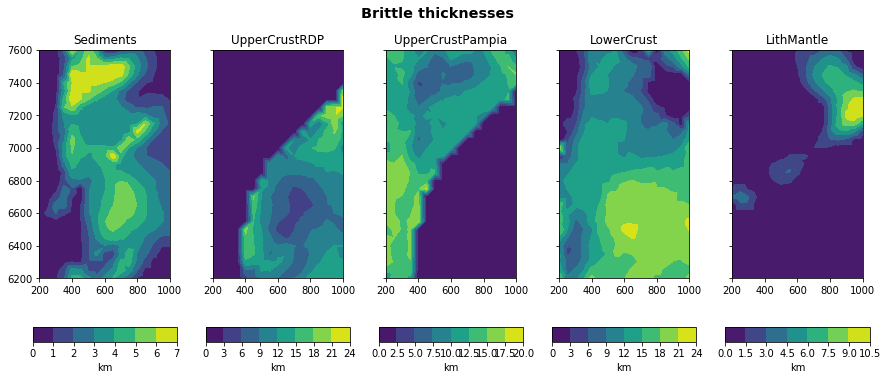

In [19]:
triangles = tri.Triangulation(x, y)

fig, axes = plt.subplots(1, len(ts.keys()) - 1,
                         sharex=True, sharey=True,
                         figsize=(15,6))
i = 0
for layer_id in ts:
    if layer_id == model.n_layers - 1:
        break
    layer_name = model.layer_dict[layer_id]
    ax = axes[i]
    ax.set_aspect('equal')
    cm = ax.tricontourf(triangles, ts[layer_id]/1000)
    ax.set_title(layer_name)
    fig.colorbar(cm, ax=ax, orientation='horizontal', aspect=10, label='km')
    i += 1
fig.suptitle('Brittle thicknesses', fontweight='bold', fontsize='x-large')

# Wells

Text(0.5, 0, 'grad(T) / °C/km')

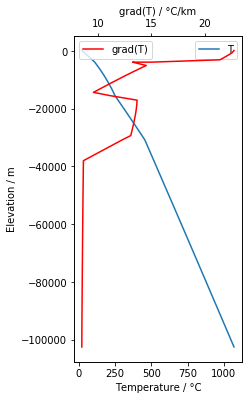

In [29]:
well = model.get_well(600e3, 7000e3, 'T', store=False)
fig, ax = plt.subplots(figsize=(3,6))
ax2 = ax.twiny()
well.plot_var('T', ax=ax)
well.plot_grad('T', scale=-1000, ax=ax2, color='red')
ax.legend()
ax2.legend()
ax.set_xlabel('Temperature / °C')
ax.set_ylabel('Elevation / m')
ax2.set_xlabel('grad(T) / °C/km')